#Task 2 
* Understand the normal equations approach to linear regression
* Understand the basics of regularization.
* Understand the limitations of feature engineering.

*
**Question-1**

Solving the Linear Regression Problem using Normal Equations Method

In [ ]:
# mount the data into google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing Various Packages required

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt      
%matplotlib inline 
import seaborn as sns

Reading the data from the "Concrete_Data.xls" file using the pandas library

In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/Machine learning for engineering for science application./Concrete_Data.xls')

**Breaf intoductuion about data**

Data Set Information:

Number of instances 1030

Number of Attributes 9

Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable

Missing Attribute Values None

**Input variable (Indenpendent variable)** 

*   Cement (kg in a m3 mixture) 
*   Blast Furnace Slag (kg in a m3 mixture)
*   Fly Ash 
*   Water
*   Superplasticizer
*   Coarse Aggregate
*   Fine Aggregate
*   Age

**Target Variable (Dependent variable)**


*   Concrete compressive strength


*Overview of the Model**

*   NULL/MISSING values
*   Checking the duplicate values
*   Creating Dummy Variables
*   Spliting the data into 3 part( train ,test, validation)
*   Building the linear model

**Data Cleaning and Data Analysis**

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

**Plotting the Correlation Heat Map**

#step no 2
# Data pre-processing

In [ ]:
X = df.drop(["Concrete compressive strength(MPa, megapascals) "],axis=1)
Y = df["Concrete compressive strength(MPa, megapascals) "]

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Dividing the Datasets into Train and Test datasets in the ratio 70:30**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [ ]:
from sklearn import metrics

**Question-1: Solving the Linear Regression Problem using the Normal Equations method**

In [ ]:
m1 = X_train.shape[0]
m2 = X_test.shape[0]

Adding an Extra Column of 1 to the training and test data sets

In [ ]:
X_train = np.append(X_train, np.ones((m1,1)), axis=1)
X_test = np.append(X_test, np.ones((m2,1)), axis=1)

**Finding the Coefficients of Linear Regression by using the Normal Equations method**

In [ ]:
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, Y_train))

**These are the required 9 coefficient values obtained by using Normal Equations for Linear Regression**

In [ ]:
w

array([ 1.24381236e-01,  1.02625749e-01,  9.26706890e-02, -1.55913391e-01,
        2.42508380e-01,  1.60843795e-02,  1.87023631e-02,  1.08063533e-01,
       -2.00761517e+01])

In [ ]:
w.shape

(9,)

**Predicting the Concrete Compressive Strength values by using the obtained coefficients (w) of Normal Equations Method for the Test Dataset**

In [ ]:
normal_test_predictions = np.dot(X_test,w)

In [ ]:
normal_test_predictions.shape

(309,)

**Evaluation using the R-Squared and Mean Squared Error Values for the Test Data**

In [ ]:
metrics.r2_score(Y_test,normal_test_predictions)

0.5917580410437959

In [ ]:
metrics.mean_squared_error(Y_test,normal_test_predictions)

108.59934654340952

**The R-Squared and Mean-Squared Error values obtained here for the test data are same as the values obtained in the previous homework assignment for the test data.**

**Therefore, we can conclude that the evaluation parameters obtained in the previous assignment (model made using Linear Regression from sklearn library) are the same as the evaluation paramerts obtained if Linear Regression is done using the Normal Equations Method (this assignment)**

**Finally, the predicted values in the previous assignment and this assignment are the same**

**Predicting the Concrete Compressive Strength values by using the obtained coefficients (w) of Normal Equations Method for the Training Dataset**

In [ ]:
normal_train_predictions = np.dot(X_train,w)

**Evaluation using the R-Squared and Mean Squared Error Values for the Training Data**

In [ ]:
metrics.r2_score(Y_train,normal_train_predictions)

0.6228179353208059

In [ ]:
metrics.mean_squared_error(Y_train,normal_train_predictions)

107.20206614023294

**The R-Squared and Mean-Squared Error values obtained here for the training data are same as the values obtained in the previous homework assignment for the training dataset.**

**Therefore, we can conclude that the evaluation parameters obtained in the previous assignment (model made using Linear Regression from sklearn library) are the same as the evaluation paramerts obtained if Linear Regression is done using the Normal Equations Method (this assignment)**

**Finally, the predicted values in the previous assignment and this assignment are the same**

**Question 2:**

**Introduction of L2 Regularization into the Linear Regression Model**

**Various Values of Regularization parameters are chosen below**

In [ ]:
reg_param = [1e-7,1e-5,0.001,0.01,0.1,1,10,100,1000]
n = len(X_train[0])

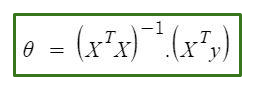

In [ ]:
j = 0
w_reg = []
for i in reg_param:
  mat1 = np.dot(X_train.T,X_train)
  mat2 = i*(np.identity(n))
  w_reg.append(np.dot(np.linalg.inv(mat1+mat2),np.dot(X_train.T,Y_train)))
  j = j+1

**Prediction using the L2 Regularization model**

In [ ]:
reg_test_predictions = []
reg_train_predictions = []
for j in range(9):
  reg_test_predictions.append(np.dot(X_test,w_reg[j]))
  reg_train_predictions.append(np.dot(X_train,w_reg[j]))

**R-Squared and Mean-Squared error values for various regularization parameters are shown below**

In [ ]:
for j in range(9):
  print("Regularization parameter" +str(reg_param[j])+" ,R2-Squared Value for the test data "+str(metrics.r2_score(Y_test,reg_test_predictions[j]))+" MSE value  "+str(metrics.mean_squared_error(Y_test,reg_test_predictions[j])))

Regularization parameter1e-07 ,R2-Squared Value for the test data 0.5917580406464762 MSE value  108.59934664910335
Regularization parameter1e-05 ,R2-Squared Value for the test data 0.591758001302374 MSE value  108.59935711530777
Regularization parameter0.001 ,R2-Squared Value for the test data 0.5917540812034398 MSE value  108.6003999287014
Regularization parameter0.01 ,R2-Squared Value for the test data 0.5917198066988227 MSE value  108.60951753340333
Regularization parameter0.1 ,R2-Squared Value for the test data 0.5914948082980953 MSE value  108.6693709579626
Regularization parameter1 ,R2-Squared Value for the test data 0.5911803663618154 MSE value  108.75301789345437
Regularization parameter10 ,R2-Squared Value for the test data 0.5911046788217105 MSE value  108.77315207421788
Regularization parameter100 ,R2-Squared Value for the test data 0.5910707304677898 MSE value  108.7821829172538
Regularization parameter1000 ,R2-Squared Value for the test data 0.5908228124837205 MSE value  1

In [ ]:
for j in range(9):
  print("Regularization Parameter"+str(reg_param[j])+" , R2-Squared Value for the training data "+str(metrics.r2_score(Y_train,reg_train_predictions[j]))+" MSE value "+str(metrics.mean_squared_error(Y_train,reg_train_predictions[j])))

Regularization Parameter1e-07 , R2-Squared Value for the training data 0.6228179353208056 MSE value 107.202066140233
Regularization Parameter1e-05 , R2-Squared Value for the training data 0.6228179353188716 MSE value 107.20206614078269
Regularization Parameter0.001 , R2-Squared Value for the training data 0.6228179163496989 MSE value 107.20207153216977
Regularization Parameter0.01 , R2-Squared Value for the training data 0.6228163316848877 MSE value 107.2025219229964
Regularization Parameter0.1 , R2-Squared Value for the training data 0.6227687663442459 MSE value 107.21604086589151
Regularization Parameter1 , R2-Squared Value for the training data 0.6226531700602267 MSE value 107.24889545163524
Regularization Parameter10 , R2-Squared Value for the training data 0.6226219674098307 MSE value 107.25776381761746
Regularization Parameter100 , R2-Squared Value for the training data 0.622618206623266 MSE value 107.2588327021902
Regularization Parameter1000 , R2-Squared Value for the training 

**Question 2 (a) and (b): As the Regularization Parameter value increases, the R-Squared value decreases and the Mean-Squared error value increases which implies the Quality of the model decreases.**

**Finally, we can say that as the Regularization Parameter value increases, then the quality of the model decreases.**

**Question 3: Quadratic Model**

**Question 3(a): Input vector now has 45 features in Quadratic model**

**Explanation: 10C2 = 45 features in Qudratic Model**

**Question 3(b): The Program is written for the Quadratic Model below**

In [ ]:
X_t = []
for m in range(len(X_train)):
  k = [1]
  for i in range(0,8):
    j = i
    while(j<=8):
      k.append((X_train[m][i])*(X_train[m][j]))
      j = j+1
  X_t.append(k)
X_t = np.array(X_t)

**Here, the New Training dataset has 45 Features in Quadratic model**

y= w0+w1.x1+w2.x2+.......w8.x8+w9.(x1)^2.........+w17.(x8)^2+NC2 (all cross terms)

In [ ]:
X_t.shape

(721, 45)

**Modifying the Test Dataset**

In [ ]:
X_te = []
for m in range(len(X_test)):
  k = [1]
  for i in range(0,8):
    j = i
    while(j<=8):
      k.append((X_test[m][i])*(X_test[m][j]))
      j = j+1
  X_te.append(k)
X_te = np.array(X_te)

In [ ]:
X_te.shape

(309, 45)

**Obtaining Coefficients (w_quad) for the Quadratic model**

In [ ]:
w_quad = np.dot(np.linalg.inv(np.dot(X_t.T, X_t)), np.dot(X_t.T, Y_train))

In [ ]:
w_quad.shape

(45,)

**Question 3(c): Predicting the results for the Quadratic Model**

In [ ]:
quad_test_pred = np.dot(X_te,w_quad)

In [ ]:
metrics.r2_score(Y_test,quad_test_pred)

0.7875737889662844

In [ ]:
metrics.mean_squared_error(Y_test,quad_test_pred)

56.509006976984416

In [ ]:
quad_train_pred = np.dot(X_t,w_quad)

In [ ]:
metrics.r2_score(Y_train,quad_train_pred)

0.808153561785769

In [ ]:
metrics.mean_squared_error(Y_train,quad_train_pred)

54.5262791742297

**Question 3(c): From the above Evaluation we can see that the R-Squred value is increased and the Mean-Squared error value is decreased drastically which implies that the model has improved drastically**

**Finally, Quadratic Model is better rthan the Linear model in this case**

**Question 3(d): If a Cubic model was used, then we would need 165 Features (Input Vector has 165 columns)**

**Reason- 11C3 = 165 Features**